<a href="https://colab.research.google.com/github/drissdunn/UmojaHack-2022/blob/main/umjhpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UmojaHack 2022 Beginner Practice Challenge

In [ ]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
#Loading and reading the datasets
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/umjb/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/umjb/Test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Datasets/umjb/SampleSubmission.csv')

### Getting insight from the data

In [ ]:
print(train_data.shape)
train_data.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [ ]:
print(test_data.shape)
test_data.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [ ]:
print(sub.shape)
sub.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [ ]:
train_data.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

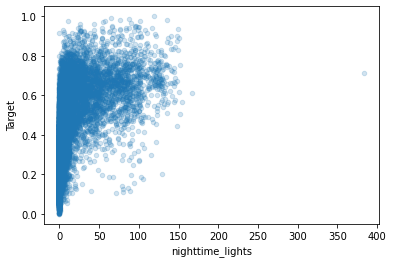

In [ ]:
# Plotting the relationship between an input column and the target
train_data.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

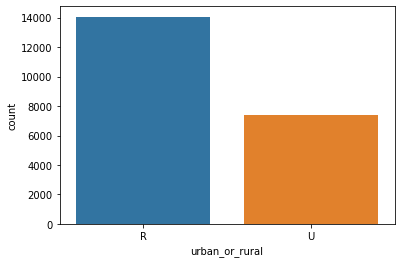

In [ ]:
sns.countplot(x = 'urban_or_rural', data = train_data)

In [ ]:
train_data['country'].unique()

array(['Ethiopia', 'Mozambique', 'Malawi', 'Guinea', 'Cameroon', 'Ghana',
       'Senegal', 'Kenya', 'Tanzania', 'Mali', 'Swaziland', 'Rwanda',
       'Nigeria', 'Lesotho', 'Sierra Leone', 'Central African Republic',
       "Cote d'Ivoire", 'Togo'], dtype=object)

In [ ]:
train_data['urban_or_rural'].unique()

array(['R', 'U'], dtype=object)

In [ ]:
train_data['ghsl_water_surface'].sum()

606.264343720255

### Data Preprocessing

In [ ]:
ur = {'R': 1, 'U': 0}
train_data['urban_or_rural'] = train_data['urban_or_rural'].map(ur)
test_data['urban_or_rural'] = test_data['urban_or_rural'].map(ur)

In [ ]:
train_data = train_data.drop('ID', axis = 1)
test_data = test_data.drop('ID', axis = 1)

In [ ]:
train_data.head()

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,Ethiopia,2016,1,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,Ethiopia,2005,1,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,Mozambique,2009,1,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,Malawi,2015,1,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,Guinea,2012,0,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [ ]:
print(len(train_data.loc[train_data['ghsl_water_surface'] == 0]))

17033


In [ ]:
train_data.shape

(21454, 18)

In [ ]:
# scaling the year column
sc = StandardScaler()
train_data[['year']] = sc.fit_transform(train_data[['year']])
test_data[['year']] = sc.fit_transform(test_data[['year']])

In [ ]:
# seperating the dependent variable from the independent
x = train_data.drop('Target', axis = 1).values
y = train_data['Target'].values

In [ ]:
x

array([['Ethiopia', 1.2374551015054718, 1, ..., 0.0, 278.7884505908687,
        769.3383780420382],
       ['Ethiopia', -1.0544658141005163, 1, ..., 0.0, 200.98697800356385,
        337.13524334720745],
       ['Mozambique', -0.22104002660742972, 1, ..., 0.0,
        642.5942075736064, 169.9137732887006],
       ...,
       ['Ghana', 0.8207422077589286, 1, ..., 0.4424216217270814,
        166.40524879189613, 155.36535463490787],
       ['Ghana', 0.8207422077589286, 1, ..., 0.0, 568.7596646752736,
        534.6386282281953],
       ['Mozambique', 0.19567286713911358, 1, ..., 0.0,
        1486.1510147949098, 216.5194080226084]], dtype=object)

In [ ]:
# Encoding the country column
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])
test_data = test_data.values
test_data[:, 0] = le.fit_transform(test_data[:, 0])

In [ ]:
# Replace zero with the mean
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x)
x = imputer.transform(x)

In [ ]:
x

array([[ 3.00000000e+00,  1.23745510e+00,  1.00000000e+00, ...,
         0.00000000e+00,  2.78788451e+02,  7.69338378e+02],
       [ 3.00000000e+00, -1.05446581e+00,  1.00000000e+00, ...,
         0.00000000e+00,  2.00986978e+02,  3.37135243e+02],
       [ 1.00000000e+01, -2.21040027e-01,  1.00000000e+00, ...,
         0.00000000e+00,  6.42594208e+02,  1.69913773e+02],
       ...,
       [ 4.00000000e+00,  8.20742208e-01,  1.00000000e+00, ...,
         4.42421622e-01,  1.66405249e+02,  1.55365355e+02],
       [ 4.00000000e+00,  8.20742208e-01,  1.00000000e+00, ...,
         0.00000000e+00,  5.68759665e+02,  5.34638628e+02],
       [ 1.00000000e+01,  1.95672867e-01,  1.00000000e+00, ...,
         0.00000000e+00,  1.48615101e+03,  2.16519408e+02]])

### Training the model

In [ ]:
# splitting the train dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
ct = CatBoostRegressor()
ct.fit(x_train, y_train)

Learning rate set to 0.062817
0:	learn: 0.1860594	total: 54.8ms	remaining: 54.8s
1:	learn: 0.1790019	total: 62.5ms	remaining: 31.2s
2:	learn: 0.1727197	total: 68.9ms	remaining: 22.9s
3:	learn: 0.1664517	total: 75.6ms	remaining: 18.8s
4:	learn: 0.1610342	total: 82.2ms	remaining: 16.4s
5:	learn: 0.1560782	total: 88.7ms	remaining: 14.7s
6:	learn: 0.1514368	total: 95ms	remaining: 13.5s
7:	learn: 0.1470674	total: 102ms	remaining: 12.6s
8:	learn: 0.1429704	total: 108ms	remaining: 11.9s
9:	learn: 0.1394503	total: 115ms	remaining: 11.3s
10:	learn: 0.1360246	total: 121ms	remaining: 10.9s
11:	learn: 0.1330686	total: 128ms	remaining: 10.5s
12:	learn: 0.1302918	total: 147ms	remaining: 11.2s
13:	learn: 0.1277416	total: 154ms	remaining: 10.8s
14:	learn: 0.1255343	total: 160ms	remaining: 10.5s
15:	learn: 0.1233746	total: 167ms	remaining: 10.2s
16:	learn: 0.1215229	total: 173ms	remaining: 9.99s
17:	learn: 0.1197723	total: 179ms	remaining: 9.78s
18:	learn: 0.1180335	total: 186ms	remaining: 9.58s
19:	le

In [ ]:
def report(model):
    pred = model.predict(x_test)
    print(f'The mean square error is {mean_squared_error(pred, y_test)}')
    print(f'The r2_score is {r2_score(pred, y_test)}')

In [ ]:
report(rf)

The mean square error is 0.00824575288521209
The r2_score is 0.7269255518480324


In [ ]:
report(lr)

The mean square error is 0.014299947948356985
The r2_score is 0.4195016884724976


In [ ]:
report(ct)

The mean square error is 0.007597797418258038
The r2_score is 0.7524500587510934


In [ ]:
pred = ct.predict(test_data)

In [ ]:
submission = sub.copy()
submission.Target = pred
submission.to_csv('submission3.csv', index=False)